##Understanding Data with time series Analysis


* **What is Time-Series Analysis?**

It is the way of studying characteristics of the response variable concerning time as the independent variable. To estimate the target variable in predicting or forecasting, we use the time variable as reference point.

* TSA represents a series of time-based orders, it would be Years, Months, Weeks, Days, Horus, Minutes, and Seconds.


###Objectives of Time series Analysis

* To understand how time series works and what factors affect a certain variable(s) at different points in time.


* Time series analysis will provide the consequences and insights of the given dataset’s features that change over time.


* Supporting to derive the predicting the future values of the time series variable.


* **Assumptions:** There is only one assumption in TSA, which is “stationary,” which means that the origin of time does not affect the properties of the process under the statistical factor.



### **Significance of the Time series**

* Analyzing the historical dataset and its patterns

* Understanding and matching the current situation with patterns derived from the previous stage.

* Understanding the factor or factors influencing certain variables in different periods.


###**Components of Time-series Analysis**

* **Trend:** refers to the overall direction of data over time. It would be negative or positive or Null trend

* **Seasonality:** Repeating patterns of data over a set period of time. It would be a bell curve or saw tooth

* **Cyclical:** repeating but no seasonal patterns i.e, in which there is no fixed interval, uncertainty in movement and its patterns.

* **Irregularity:** Unpredictable up's and down's in the data that cannot be explained by other component.

###**Limitation of Time-series Analysis**

* Missing values are not supported by Time-series analysis

* the data points must be linear in their relationship

* data transformation are mandatory, so they are a little expensive

* models mostly work on uni-variate data


###**Data Types of Time Series**

There are two major data types - **stationary** and **non-stationary**

* **Stationary:**A dataset should follow the below thumb rules without having Trend, Seasonality, Cyclical, and Irregularity components of the time series.

--> mean, variance shopuld be constant w.r.t data-frame

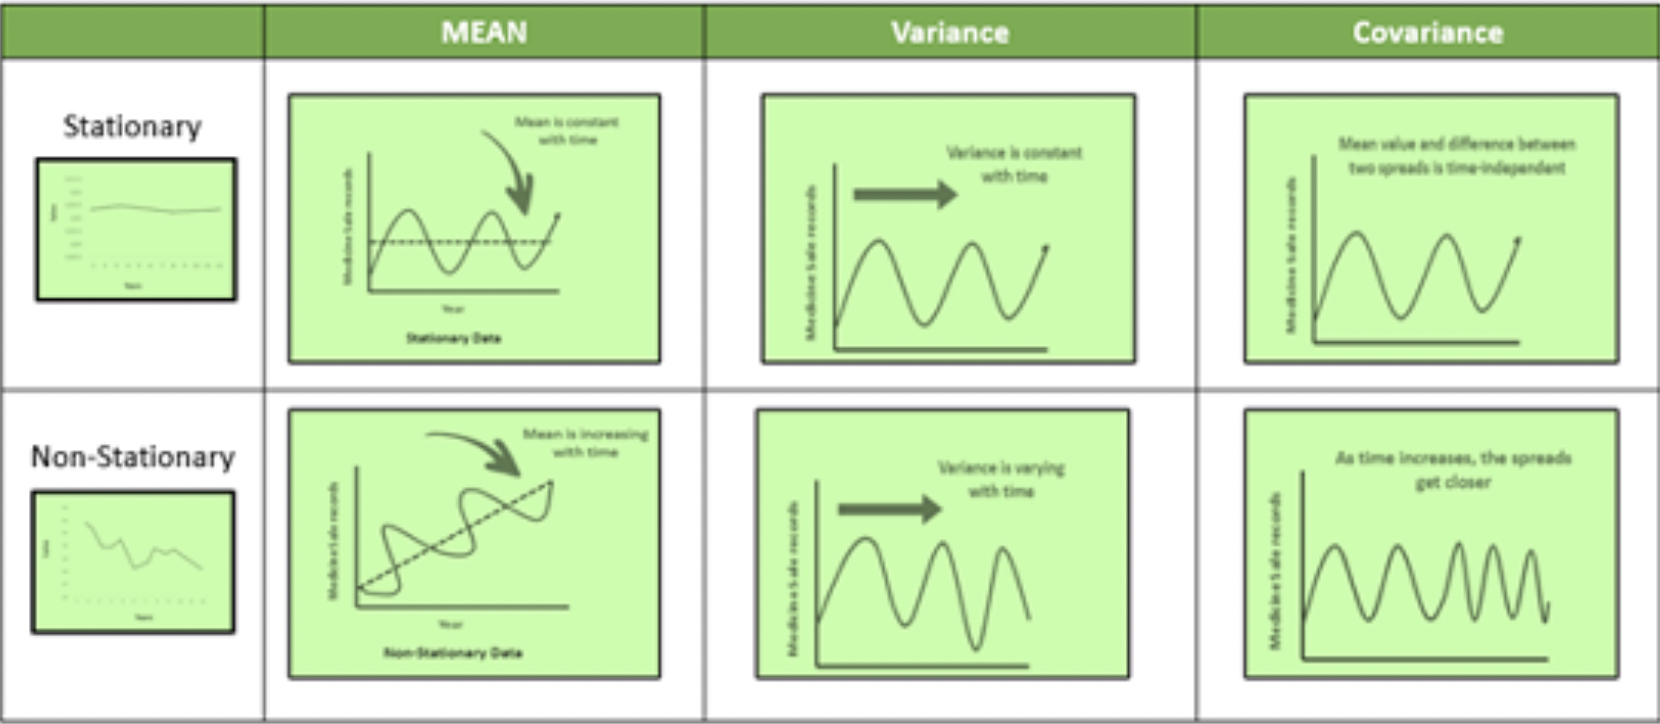

* **Non-stationary:** If either the mean-variance or covariance is changing with respect to time, the dataset is called non-stationary.



###Methods to check Stationarity


There are two Statistical tests available to test if the dataset is stationary or not:

* Augmented Dickey-Fuller (ADF) Test

* Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test


##**Example:**



Below is the example of the analysis of the Trade market share over teo decades.

I have used LSTM to analysis the trend of the market.

**LSTM - long-short term Memory method**

* It is a type of recurrent neural network (RNN) architecture used in the field of deep learning. LSTMs are particularly known for their effectiveness in handling sequences of data, making them suitable for applications such as natural language processing, speech recognition, and time series analysis.

In [ ]:
import pandas as pd
df = pd.read_csv('MSFT.csv')

In [ ]:
#display the data from dataframe
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9540,2024-01-22,400.019989,400.619995,393.589996,396.510010,396.510010,27016900
9541,2024-01-23,395.750000,399.380005,393.929993,398.899994,398.899994,20525900
9542,2024-01-24,401.540009,405.630005,400.450012,402.559998,402.559998,24867000
9543,2024-01-25,404.320007,407.010010,402.529999,404.869995,404.869995,21021200


* From the dataset we can observe the data of the stock such as - opened value, its highest, lowest, closing, adjusted closing value of the stock and the volume of the stocks traded that day.

In [ ]:
#here I'm just taking the Date and Close cloumn to keep the analysis simple.
#As in Date the stock is available and the closing value of that stock on that particular day.

df = df[['Date', 'Close']]
df

df['Date']


0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9540    2024-01-22
9541    2024-01-23
9542    2024-01-24
9543    2024-01-25
9544    2024-01-26
Name: Date, Length: 9545, dtype: object

In [ ]:
#to convert the Datatype of "Date" from Object to "Date"

import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

* Applying above conversion to all the Date string Objects to convert them into "Date" object

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-31-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9540   2024-01-22
9541   2024-01-23
9542   2024-01-24
9543   2024-01-25
9544   2024-01-26
Name: Date, Length: 9545, dtype: datetime64[ns]

* We can see that the datatype is being converted into "datetime64" object

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-22,396.510010
2024-01-23,398.899994
2024-01-24,402.559998


###Ploting data using matplotlib

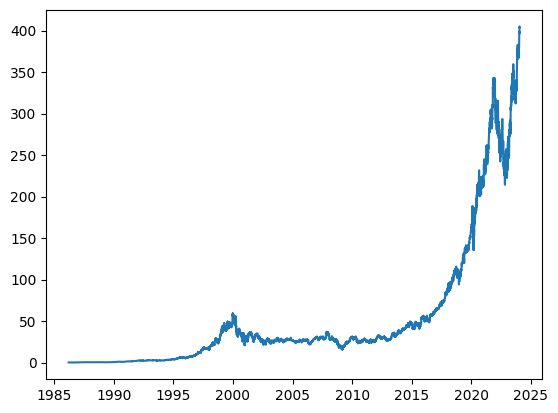

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

* we can see that there is an increasing curve from early 1980s till 2016 with a drop later on 2021


* Since we are using LSTM model to identify the trend. we need to convert this into supervised learning model

In [ ]:
import pandas as pd
import numpy as np
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    # Convert string dates to datetime
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    # Ensure the dataframe index is datetime
    dataframe.index = pd.to_datetime(dataframe.index)

    # Lists to store the results
    dates = []
    X, Y = [], []

    target_date = first_date

    while target_date <= last_date:
        # Get the subset of dataframe up to the target date
        df_subset = dataframe[dataframe.index <= target_date].tail(n + 1)

        # Check if the subset is smaller than the window size
        if len(df_subset) < n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            break

        # Extract the 'Close' values and split them into X (inputs) and Y (target)
        values = df_subset['Close'].values
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Increment the target date by 1 day
        target_date += datetime.timedelta(days=1)

    # Create the final DataFrame
    ret_df = pd.DataFrame({'Target Date': dates})
    for i in range(n):
        ret_df[f'Target-{n - i}'] = [x[i] for x in X]
    ret_df['Target'] = Y

    return ret_df



# Usage example with your actual dataframe 'df'
windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-23', n=3)
print(windowed_df.head())


  Target Date    Target-3    Target-2    Target-1      Target
0  2021-03-25  235.990005  237.580002  235.460007  232.339996
1  2021-03-26  237.580002  235.460007  232.339996  236.479996
2  2021-03-27  237.580002  235.460007  232.339996  236.479996
3  2021-03-28  237.580002  235.460007  232.339996  236.479996
4  2021-03-29  235.460007  232.339996  236.479996  235.240005


* Here Target-3, Target-2, Target-1 represents the three previous 3 day values from that particular date whereas Target is the actual value on that year.

In this way, we can say that we have converted the model into supervised model with target date and its target value along with there input values i.e, Target-1, Target-2, Target-3

In [ ]:
#To convert the above data into numpy array
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((364,), (364, 3, 1), (364,))

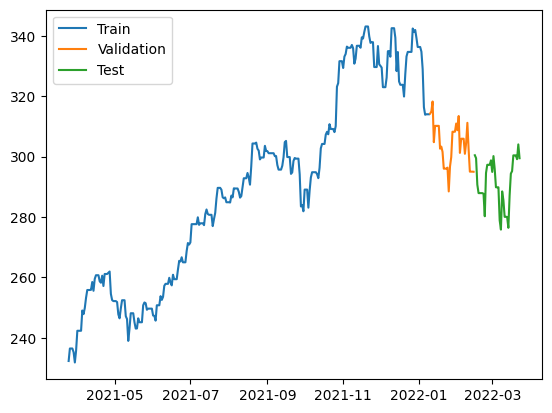

In [ ]:
#Splitting the data into train, test, validation partition

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer = Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100
10/10 [==============================] - 4s 125ms/step - loss: 84825.6406 - mean_absolute_error: 289.4962 - val_loss: 92193.5312 - val_mean_absolute_error: 303.5528
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 84445.5156 - mean_absolute_error: 288.8413 - val_loss: 91856.4219 - val_mean_absolute_error: 302.9970
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 84097.7891 - mean_absolute_error: 288.2378 - val_loss: 91430.8750 - val_mean_absolute_error: 302.2939
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 83609.5781 - mean_absolute_error: 287.3918 - val_loss: 90756.1953 - val_mean_absolute_error: 301.1760
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 82852.6562 - mean_absolute_error: 286.0662 - val_loss: 89772.9844 - val_mean_absolute_error: 299.5393
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 81756.4531 - mean_absolute_error: 284.1405 - val_

10/10 [==============================] - 0s 3ms/step


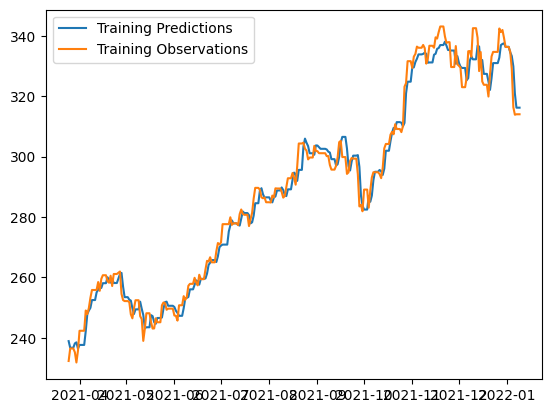

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])


2/2 [==============================] - 0s 6ms/step


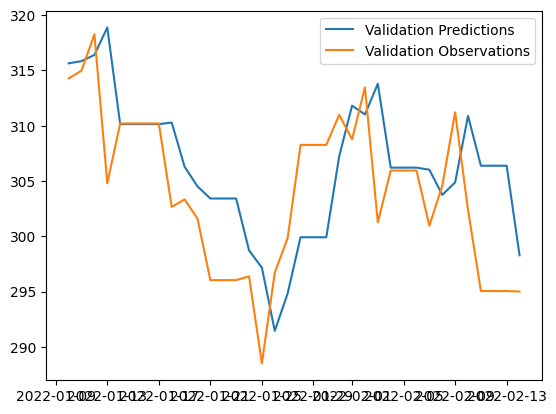

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])


2/2 [==============================] - 0s 6ms/step


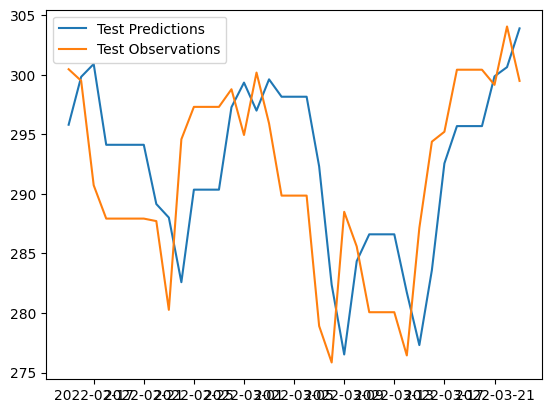

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])


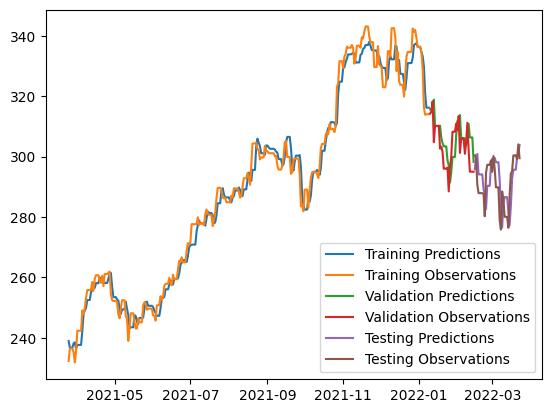

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


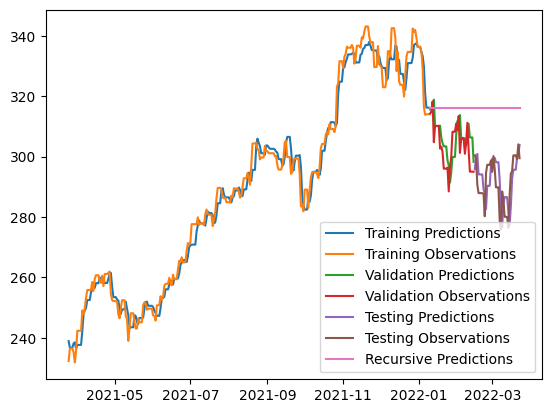

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

###References:


https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

https://www.datacamp.com/tutorial/tutorial-time-series-forecasting

https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/


###License:


MIT License Copyright (c) 2024 Anusree Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE





